# DynMod, Mass Balance cases

#### Bernt Lie, University College of Southeast Norway

### Basic import and definitions

In [1]:
from OMPython import ModelicaSystem
import numpy as np
import numpy.random as nr
%matplotlib inline
%config InlineBackend.figure_formats={'svg',}  # use high quality SVG instead of PNGs
import matplotlib.pyplot as plt
import pandas as pd
LW1 = 2.5
LW2 = LW1/2
Cb1 = (0.3,0.3,1)
Cb2 = (0.7,0.7,1)
Cg1 = (0,0.6,0)
Cg2 = (0.5,0.8,0.5)
Cr1 = "Red"
Cr2 = (1,0.5,0.5)
LS1 = "solid"
LS2 = "dotted"
#### 
createPDF = False  # set to 'True' if you want to save plots as PDFs in addition
if createPDF:
    %mkdir figs
    figpath = "../figs/"
####
case = "MassBalanceCases"
####
%mkdir $case # create a subfolder for this case
%cd $case

/home/dietmarw/.workspace/FM1015/MassBalanceCases


### Water Tank without Input: AutoTank

#### Modelica code, file AutoTank

In [2]:
%%writefile AutoTank.mo
package AutoTank
  // Package for simulating autonomous tank
  // author: 	Bernt Lie
  //			University of Southeast Norway
  //			May 11, 2017
  //
  model SimAutoTank
    // Main Auto Tank model
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			May 11, 2017
	//
	// Parameters
	parameter Real rho = 1 "Density of liquid, kg/L";
	parameter Real A = 5 "Cross sectional area of tank, dm2";
	parameter Real K = 5 "Valve constant, kg/s";
	parameter Real h_s = 3 "Scaling level, dm";
	// Initial state parameters
	parameter Real h0 = 1.5 "Initial tank level, dm";
	parameter Real m0 = rho*h0*A "Initial tank mass, kg";
    // Declaring variables
	// -- states
	Real m(start = m0, fixed=true) "Mass in tank, kg";
	// -- auxiliary variables
	Real V "Tank liquid volume, L";
	Real h "Tank liquid level, dm";
	Real md_e "Effluent mass flow from tank, kg/s";
	// -- input variables
    
	// -- output variables
	output Real _h;
  // Initializating in steady state
  /*
  initial equation
	der(m) = 0;
	*/
  // Equations constituting the model
  equation
	// Algebraic equations
	m = rho*V;
	V = A*h;
	md_e = K*sqrt(h/h_s);
	// md_e = max(K*sign(h)*sqrt(abs(h/h_s)),0);
    // Differential equations
	der(m) = -md_e;
	// Outputs
	_h = h;
  end SimAutoTank;
  //
  model SimAutoTank1
    // Main Auto Tank model
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			May 11, 2017
	//
	// Parameters
	parameter Real rho = 1 "Density of liquid, kg/L";
	parameter Real A = 5 "Cross sectional area of tank, dm2";
	parameter Real K = 5 "Valve constant, kg/s";
	parameter Real h_s = 3 "Scaling level, dm";
	// Initial state parameters
	parameter Real h0 = 1.5 "Initial tank level, dm";
	parameter Real m0 = rho*h0*A "Initial tank mass, kg";
    // Declaring variables
	// -- states
	Real m(start = m0, fixed=true) "Mass in tank, kg";
	// -- auxiliary variables
	Real V "Tank liquid volume, L";
	Real h "Tank liquid level, dm";
	Real md_e "Effluent mass flow from tank, kg/s";
	// -- input variables
    
	// -- output variables
	output Real _h;
  // Initializating in steady state
  /*
  initial equation
	der(m) = 0;
	*/
  // Equations constituting the model
  equation
	// Algebraic equations
	m = rho*V;
	V = A*h;
	// md_e = K*sqrt(h/h_s);
	md_e = max(K*sign(h)*sqrt(abs(h/h_s)),0);
    // Differential equations
	der(m) = -md_e;
	// Outputs
	_h = h;
  end SimAutoTank1;
  // End package
end AutoTank;

Writing AutoTank.mo


#### Instantiating model from SimAutoTank

In [3]:
tnk = ModelicaSystem("AutoTank.mo","AutoTank.SimAutoTank")

2017-08-09 10:55:13,529 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.dd841bebb14e4ab68a1298365b07ca83


#### Checking model **quantities**

In [4]:
q = tnk.getQuantities()

In [5]:
pd.DataFrame(q)

,Changeable,Description,Name,Value,Variability,alias,aliasvariable
0,false,"Mass in tank, kg",m,None,continuous,noAlias,None
1,false,"der(Mass in tank, kg)",der(m),None,continuous,noAlias,None
2,false,"Tank liquid volume, L",V,None,continuous,noAlias,None
3,false,None,_h,None,continuous,noAlias,None
4,false,"Effluent mass flow from tank, kg/s",md_e,None,continuous,noAlias,None
5,true,"Cross sectional area of tank, dm2",A,5.0,parameter,noAlias,None
6,true,"Valve constant, kg/s",K,5.0,parameter,noAlias,None
7,true,"Initial tank level, dm",h0,1.5,parameter,noAlias,None
8,true,"Scaling level, dm",h_s,3.0,parameter,noAlias,None
9,false,"Initial tank mass, kg",m0,None,parameter,noAlias,None


#### Checking inputs

In [6]:
tnk.getInputs()

{}

-- as expected, there are no external inputs for model SimAutoTank!

#### Checking and setting simulation options

In [7]:
sopt = tnk.getSimulationOptions()

In [8]:
type(sopt)

dict

In [9]:
sopt

{'solver': 'dassl',
 'startTime': 0.0,
 'stepSize': 0.002,
 'stopTime': 1.0,
 'tolerance': 1e-06}

In [10]:
tnk.setSimulationOptions(startTime=0,stopTime=5)

#### Simulating water tank

In [11]:
tnk.simulate()

#### Checking available solutions

In [12]:
sol = tnk.getSolutions()

In [13]:
sol

('A',
 'K',
 'V',
 '_h',
 'der(m)',
 'h',
 'h0',
 'h_s',
 'm',
 'm0',
 'md_e',
 'rho',
 'time')

#### Extracting and plotting results

In [14]:
tm,h = tnk.getSolutions("time","_h")

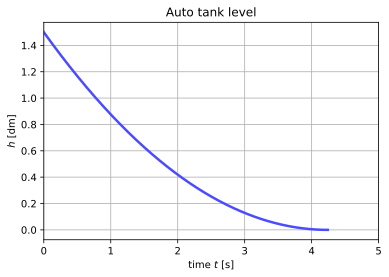

In [15]:
plt.plot(tm,h,linewidth=LW1,color=Cb1,label=r"$h$")
plt.title("Auto tank level")
plt.xlabel(r"time $t$ [s]")
plt.ylabel(r"$h$ [dm]")
plt.grid()
plt.xlim(0,5)
if createPDF:
    figfile = "autoTankSim-1.pdf"
    plt.savefig(figpath+figfile)

As is seen, the plot stops before 5 s has passed. Upon checking, there is an error message: "stdout            | info    | model terminate | Simulation terminated by an assert at time: 4.2427". The reason is that the level has become negative, and the code crashes.

#### Refining model to allow for possibility of negative level

In [16]:
tnk1 = ModelicaSystem("AutoTank.mo","AutoTank.SimAutoTank1")

2017-08-09 10:55:17,101 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.cc201662f2a64090bf2184ef7e6a4a37


In [17]:
tnk1.setSimulationOptions(stopTime=5)
tnk1.simulate()
tm,h = tnk1.getSolutions("time","_h")

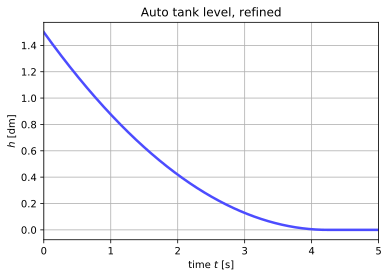

In [18]:
plt.plot(tm,h,linewidth=LW1,color=Cb1,label=r"$h$")
plt.title("Auto tank level, refined")
plt.xlabel(r"time $t$ [s]")
plt.ylabel(r"$h$ [dm]")
plt.grid()
plt.xlim(0,5)
if createPDF:
    figfile = "autoTankSim-2.pdf"
    plt.savefig(figpath+figfile)

### Water Tank **with** Input: DrivenTank

#### Modelica code, file DrivenTank

In [19]:
%%writefile DrivenTank.mo
package DrivenTank
  // Package for simulating driven tank
  // author: 	Bernt Lie
  //			University of Southeast Norway
  //			August 26, 2015
  //			May 11, 2017
  //
  model SimDrivenTank
	// Simulation of Driven Tank model
	// author:	Bernt Lie
	//			University of Southeast Norway
	//			August 26, 2015
	//			May 11, 2017
	//
	// Instantiate model of *driven tank* (dt)
	ModDrivenTank dt;
	// Declaring variables
	// -- inputs
	Real md_i "Mass flow into tank";
	// -- outputs
	Real _h "Level in tank";
  // Equations
  equation
    // -- input
	md_i = 2;
	dt.md_i = md_i;
	// -- output
	_h = dt.h;
  end SimDrivenTank; 
  //
  model SimStepDrivenTank
	// Simulation of Driven Tank model with step input
	// author:	Bernt Lie
	//			University of Southeast Norway
	//			August 26, 2015
	//			May 11, 2017
	//
	// Instantiate model of *driven tank* (dt)
	ModDrivenTank dt;
	// Declaring variables
	// -- inputs
	Real md_i "Mass flow into tank";
	// -- outputs
	Real _h "Level in tank";
  // Initial equations
  initial equation
    der(dt.m) = 0;
  // Equations
  equation
    // -- input
	md_i = if time < 1 then 2 else 1.5;
	dt.md_i = md_i;
	// -- output
	_h = dt.h;
  end SimStepDrivenTank; 
  //
  // 
  model ModDrivenTank
    // Main Driven Tank model
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			August 26, 2015
	//			May 11, 2017
	//
	// Parameters
	parameter Real rho = 1 "Density of liquid, kg/L";
	parameter Real A = 5 "Cross sectional area of tank, dm2";
	parameter Real K = 5 "Valve constant, kg/s";
	parameter Real h_s = 3 "Scaling level, dm";
	// Initial state parameters
	parameter Real h0 = 1.5 "Initial tank level, dm";
	parameter Real m0 = rho*h0*A "Initial tank mass, kg";
    // Declaring variables
	// -- states
	Real m(start = m0) "Mass in tank, kg";
	// -- auxiliary variables
	Real V "Tank liquid volume, L";
	Real h "Tank liquid level, dm";
	Real md_e "Effluent mass flow rate from tank, kg/s";
	// -- input variables
    input Real md_i "Influent mass flow rate to tank, kg/s"; 
  // Equations constituting the model
  equation
	// Algebraic equations
	m = rho*V;
	V = A*h;
	md_e = K*sqrt(h/h_s);
    // Differential equations
	der(m) = md_i - md_e;
  end ModDrivenTank;
  // End package
end DrivenTank;

Writing DrivenTank.mo


#### Tank with constant input

In [20]:
tnk2 = ModelicaSystem("DrivenTank.mo","DrivenTank.SimDrivenTank")

2017-08-09 10:55:20,452 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.20142bc6d07445aa97fcc162bc561cb9


Expected end of text (at char 109), (line:2, col:42)


In [21]:
tnk2.setSimulationOptions(stopTime=15)
tnk2.simulate()
tm,h = tnk2.getSolutions("time","_h")

In [22]:
tnk3 = ModelicaSystem("DrivenTank.mo","DrivenTank.SimStepDrivenTank")

2017-08-09 10:55:25,915 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.0731b65109a446ca8177aee7281b9a5f


In [23]:
tnk3.setSimulationOptions(stopTime=15)
tnk3.simulate()
tm1,h1,md_i = tnk3.getSolutions("time","_h","md_i")

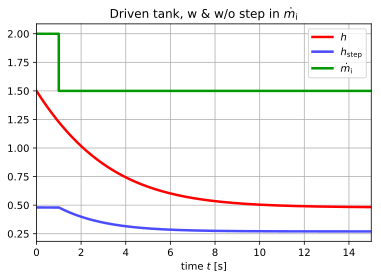

In [24]:
plt.plot(tm,h,linewidth=LW1,color=Cr1,label=r"$h$")
plt.plot(tm1,h1,linewidth=LW1,color=Cb1,label=r"$h_{\mathrm{step}}$")
plt.plot(tm1,md_i,linewidth=LW1,color=Cg1,label=r"$\dot{m}_{\mathrm{i}}$")
plt.title(r"Driven tank, w & w/o step in $\dot{m}_{\mathrm{i}}$")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,15)
plt.legend()
if createPDF:
    figfile = "drivenTankSim.pdf"
    plt.savefig(figpath+figfile)

### Water Tank with variying area, with Input: DrivenFunnelTank

#### Modelica code, file DrivenFunnelTank

In [25]:
%%writefile DrivenFunnelTank.mo
package DrivenFunnelTank
  // Package for simulating driven tank
  // author: 	Bernt Lie
  //			University of Southeast Norway
  //			August 26, 2015
  //			May 11, 2017
  //
  model SimDrivenFunnelTank
	// Simulation of Driven Funnel Tank model
	// author:	Bernt Lie
	//			University of Southeast Norway
	//			August 26, 2015
	//			May 11, 2017
	//
	// Instantiate model
	ModDrivenFunnelTank dft;
	// Declaring variables
	// -- inputs
	Real md_i "Mass flow into tank";
	// -- outputs
	Real _h "Level in tank";
  // Equations
  equation
    // -- input
	md_i = 2;
	dft.md_i = md_i;
	// -- output
	_h = dft.h;
  end SimDrivenFunnelTank; 
  //
  model SimStepDrivenFunnelTank
	// Simulation of Driven Funnel Tank model with step input
	// author:	Bernt Lie
	//			University of Southeast Norway
	//			August 26, 2015
	//			May 11, 2017
	//
	// Instantiate model
	ModDrivenFunnelTank dft;
	// Declaring variables
	// -- inputs
	Real md_i "Mass flow into tank";
	// -- outputs
	Real _h "Level in tank";
  // Initial equations
  initial equation
    der(dft.h) = 0;
  // Equations
  equation
    // -- input
	md_i = if time < 1 then 2 else 1.5;
	dft.md_i = md_i;
	// -- output
	_h = dft.h;
  end SimStepDrivenFunnelTank; 
  //
  // 
  model ModDrivenFunnelTank
    // Main Driven Funnel Tank model
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			August 26, 2015
	//			May 11, 2017
	//
	// Constants
	constant Real PI = 3.1415926535 "pi, --";
	// Parameters
	parameter Real rho = 1 "Density of liquid, kg/L";
	parameter Real R_s = sqrt(15/PI) "Scaling radius, dm";
	parameter Real h_s = 3 "Scaling level, dm";
	parameter Real K = 5 "Valve constant, kg/s";
	// Initial state parameters
	parameter Real h0 = 1.5 "Initial tank level, dm";
    // Declaring variables
	// -- states
	Real h(start = h0) "Level in funnel tank, m";
	// -- auxiliary variables
	Real A "Tank liquid surface area, dm2";
	Real r "Radius of surface area, dm";
	Real md_e "Effluent mass flow rate from tank, kg/s";
	// -- input variables
    input Real md_i "Influent mass flow rate to tank, kg/s"; 
  // Equations constituting the model
  equation
	// Algebraic equations
	A = PI*r^2;
	r = R_s/h_s*h;
	md_e = K*sqrt(h/h_s);
    // Differential equations
	rho*A*der(h) = md_i - md_e;
  end ModDrivenFunnelTank;
  // End package
end DrivenFunnelTank;

Writing DrivenFunnelTank.mo


In [26]:
tnk4 = ModelicaSystem("DrivenFunnelTank.mo","DrivenFunnelTank.SimDrivenFunnelTank")

2017-08-09 10:55:35,392 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.49217f84b2d344798d320e578b42f5f8


Expected end of text (at char 111), (line:2, col:44)


In [27]:
tnk4.setSimulationOptions(stopTime=15)
tnk4.simulate()
tm,h = tnk4.getSolutions("time","_h")

In [28]:
tnk5 = ModelicaSystem("DrivenFunnelTank.mo","DrivenFunnelTank.SimStepDrivenFunnelTank")

2017-08-09 10:55:42,491 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.6ffdb5f7345c489f82ffd3305826deb2


Expected end of text (at char 127), (line:2, col:29)


In [29]:
tnk5.setSimulationOptions(stopTime=15)
tnk5.simulate()
tm1,h1,md_i = tnk5.getSolutions("time","_h","md_i")

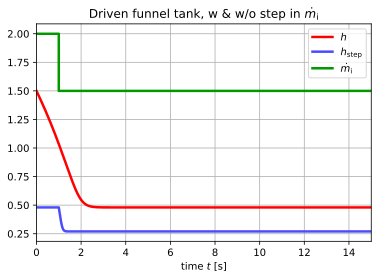

In [30]:
plt.plot(tm,h,linewidth=LW1,color=Cr1,label=r"$h$")
plt.plot(tm1,h1,linewidth=LW1,color=Cb1,label=r"$h_{\mathrm{step}}$")
plt.plot(tm1,md_i,linewidth=LW1,color=Cg1,label=r"$\dot{m}_{\mathrm{i}}$")
plt.title(r"Driven funnel tank, w & w/o step in $\dot{m}_{\mathrm{i}}$")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,15)
plt.legend()
if createPDF:
    figfile = "drivenFunnelTankSim.pdf"
    plt.savefig(figpath+figfile)

### Pressure in single gas tank

#### Modelica code, file GasTank

In [31]:
%%writefile GasTank.mo
package GasTank
  // Package for simulating gas tank
  // author: 	Bernt Lie
  //			University of Southeast Norway
  //			August 27, 2015
  //			May 11, 2017
  //
  model SimGasTank
	// Simulation of Gas Tank model
	// author:	Bernt Lie
	//			University of Southeast Norway
	//			August 27, 2015
	//			May 11, 2017
	//
	// Instantiate model
	ModGasTank gt;
	// Declaring variables
	// -- inputs
	Real p_i "Upstream (inlet) pressure, Pa";
	// -- outputs
	Real _p "Pressure in tank, Pa";
  // Equations
  equation
    // -- input
	p_i = 10*gt.p_a;
	gt.p_i = p_i;
	// -- output
	_p = gt.p;
  end SimGasTank; 
  //
  model SimStepGasTank
	// Simulation of Gas Tank model with step input
	// author:	Bernt Lie
	//			University of Southeast Norway
	//			August 27, 2015
	//			May 11, 2017
	//
	// Instantiate model
	ModGasTank gt;
	// Declaring variables
	// -- inputs
	Real p_i "Upstream (inlet) pressure, Pa";
	// -- outputs
	Real _p "Pressure in tank, Pa";
  // Initial equations
  initial equation
    der(gt.m) = 0;
  // Equations
  equation
    // -- input
	p_i = if time < 25 then 10*gt.p_a else 12*gt.p_a;
	gt.p_i = p_i;
	// -- output
	_p = gt.p;
  end SimStepGasTank; 
  //
  // 
  model ModGasTank
    // Main Gas Tank model
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			August 27, 2015
	//			May 11, 2017
	//
	// Constants
	constant Real R = 8.31 "Ideal gas constant, J/(K.mol)";
	// Parameters
	parameter Real M = 28 "Molar mass of gas, g/mol";
	parameter Real p_a = 1.03e5 "Ambient pressure, Pa";
	parameter Real V = 50e-3 "Tank volume, m3";
	parameter Real K_i = 3 "Input valve constant, kg/s";
	parameter Real K_e = 3 "Output valve constant, kg/s";
	parameter Real T = 300 "Temperature, K";
	// Initial state parameters
	parameter Real p0 = 1.2*p_a "Initial tank pressure, Pa";
	parameter Real m0 = p0*V*M/(R*T) "Initial tank mass, g";
    // Declaring variables
	// -- states
	Real m(start = m0) "Mass in tank, g";
	// -- auxiliary variables
	Real n "Mole in tank, mol";
	Real p "Pressure in tank, Pa";
	Real dp_i "Influent valve pressure drop, Pa";
	Real dp_e "Effluent valve pressure drop, Pa";
	Real md_i "Influent mass flow rate to tank, g/s";
	Real md_e "Effluent mass flow rate from tank, g/s";
	// -- input variables
    input Real p_i "Inlet pressure to tank, Pa";
  // Equations constituting the model
  equation
	// Algebraic equations
	m = n*M;
	p*V = n*R*T;
	dp_i = p_i - p;
	dp_e = p - p_a;
	md_i = K_i*sqrt(dp_i/p_a);
	md_e = K_e*sqrt(dp_e/p_a);
    // Differential equations
	der(m) = md_i - md_e;
  end ModGasTank;
  // End package
end GasTank;

Writing GasTank.mo


#### Instantiating model from SimAutoTank

In [32]:
tnk = ModelicaSystem("GasTank.mo","GasTank.SimGasTank")

2017-08-09 10:55:50,149 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.27da392d521142f1ad587cef020aa0df


Expected end of text (at char 109), (line:2, col:42)


In [33]:
tnk.setSimulationOptions(stopTime=150,stepSize=1)
tnk.simulate()
tm,p = tnk.getSolutions("time","_p")

In [34]:
tnk1 = ModelicaSystem("GasTank.mo","GasTank.SimStepGasTank")
tnk1.setSimulationOptions(stopTime=150,stepSize=1)
tnk1.simulate()
tm1,p1,p_i = tnk1.getSolutions("time","_p","p_i")

2017-08-09 10:55:51,884 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.a2375e7429b648f6b2a640dac870888e


Expected end of text (at char 129), (line:2, col:31)


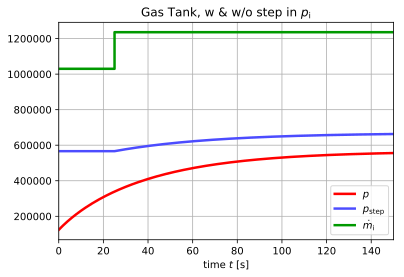

In [35]:
plt.plot(tm,p,linewidth=LW1,color=Cr1,label=r"$p$")
plt.plot(tm1,p1,linewidth=LW1,color=Cb1,label=r"$p_{\mathrm{step}}$")
plt.plot(tm1,p_i,linewidth=LW1,color=Cg1,label=r"$\dot{m}_{\mathrm{i}}$")
plt.title(r"Gas Tank, w & w/o step in $p_{\mathrm{i}}$")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,150)
plt.legend()
if createPDF:
    figfile = "gasTankSim.pdf"
    plt.savefig(figpath+figfile)

### Pressure in Gas pipe

#### Modelica code, file GasPipe

In [36]:
%%writefile GasPipe.mo
package GasPipe
  // Package for simulating gas pipe
  // author:    Bernt Lie
  //            University of Southeast Norway
  //            August 27, 2015
  //			May 11, 2017
  //
  model SimStepCompareGasPipe
    // Simulation and comparison of Gas Pipe model
    // author:  Bernt Lie
    //          University of Southeast Norway
    //          August 27, 2015
	//			May 11, 2017
    //
    // Instantiate model
    ModGasPipe gp10(N=10), gp30(N=30), gp90(N=90), gp300(N=300);
    // Declaring variables
    // -- inputs
    Real p_0 "Upstream (inlet) pressure, Pa";
    Real v "Velocity through pipe, m/s";
    // -- outputs
    output Real _pL10, _pL30, _pL90, _pL300 "Pressure at pipe end, Pa";
    output Real _mdL10, _mdL30, _mdL90, _mdL300 "Mass flow rate at exit, kg/s";
  // Initial equations
  initial equation
    der(gp10.m[:]) = zeros(gp10.N);
    der(gp30.m[:]) = zeros(gp30.N);
    der(gp90.m[:]) = zeros(gp90.N);
    der(gp300.m[:]) = zeros(gp300.N);
  // Equations
  equation
    // -- input
    p_0 = if time < 25 then 10*gp10.p_a else 12*gp10.p_a;
    gp10.p_0 = p_0;
    gp30.p_0 = p_0;
    gp90.p_0 = p_0;
    gp300.p_0 = p_0;
    v = 2e-2 "Velocity, m/s";
    gp10.v = v;
    gp30.v = v;
    gp90.v = v;
    gp300.v = v;
    // -- output
    _pL10 = gp10.p[gp10.N];
    _pL30 = gp30.p[gp30.N];
    _pL90 = gp90.p[gp90.N];
    _pL300 = gp300.p[gp300.N];
    _mdL10 = gp10.md[gp10.N];
    _mdL30 = gp30.md[gp30.N];
    _mdL90 = gp90.md[gp90.N];
    _mdL300 = gp300.md[gp300.N];
  end SimStepCompareGasPipe;
  //
  model SimGasPipe
    // Simulation of Gas Pipe model
    // author:  Bernt Lie
    //          University of Southeast Norway
    //          August 27, 2015
	//			May 11, 2017
    //
    // Instantiate model
    ModGasPipe gp;
    // Declaring variables
    // -- inputs
    Real p_0 "Upstream (inlet) pressure, Pa";
    Real v "Velocity through tube, m/s";
    // -- outputs
    output Real _pL "Pressure at tube end, Pa";
    output Real _mdL "Mass flow rate at exit, kg/s";
  // Equations
  equation
    // -- input
    p_0 = 10*gp.p_a;
    gp.p_0 = p_0;
    v = 2e-1 "Velocity, m/s";
    gp.v = v;
    // -- output
    _pL = gp.p[gp.N];
    _mdL = gp.md[gp.N];
  end SimGasPipe; 
  //
  model SimStepGasPipe
    // Simulation of Gas Pipe model with step input
    // author:  Bernt Lie
    //          University of Southeast Norway
    //          August 27, 2015
	//			May 11, 2017
    //
    // Instantiate model
    ModGasPipe gp;
    // Declaring variables
    // -- inputs
    Real p_0 "Upstream (inlet) pressure, Pa";
    Real v "Velocity through pipe, m/s";
    // -- outputs
    output Real _pL "Pressure at tube end, Pa";
    output Real _mdL "Mass flow rate at exit, kg/s";
  // Initial equations
  initial equation
    der(gp.m[:]) = zeros(gp.N);
  // Equations
  equation
    // -- input
    p_0 = if time < 25 then 10*gp.p_a else 12*gp.p_a;
    gp.p_0 = p_0;
    v = 2e-2 "Velocity, m/s";
    gp.v = v;
    // -- output
    _pL = gp.p[gp.N];
    _mdL = gp.md[gp.N];
  end SimStepGasPipe; 
  //
  // 
  model ModGasPipe
    // Underlying Gas Pipe model
    // author:  Bernt Lie
    //          University of Southeast Norway
    //          August 27, 2015
	//			May 11, 2017
    //
    // Constants
    constant Real R = 8.31 "Ideal gas constant, J/(K.mol)";
    // Parameters
    parameter Real M = 28 "Molar mass of gas, g/mol";
    parameter Real p_a = 1.03e5 "Ambient pressure, Pa";
    parameter Real A = 5e-2 "Pipe cross sectional area, m2";
    parameter Real L = 10e-1 "Pipe length, m";
    parameter Integer N = 10 "Number of slices in pipe, -";
    parameter Real dx = L/N "Slice length/thickness, m";
    parameter Real T = 300 "Temperature, K";
    parameter Real V = dx*A "Slice volume, m3";
    // Initial state parameters
    parameter Real p0 = 1.2*p_a "Initial time slice pressure, Pa";
    parameter Real m0 = p0*dx*A*M/(R*T) "Initial time slice mass, g";
    // Declaring variables
    // -- states
    Real m[N](each start = m0) "Mass in each slice, g";
    // -- auxiliary variables
    Real p[N] "Pressure in slices, Pa";
    Real n[N] "Mole in slices, mol";
    Real md[N] "Mass flow rate in slices, m/s";
    Real md_0 "Mass flow rate at inlet, m/s";
    Real Vd "Volumetric flow rate, m3/s";
    // -- input variables
    input Real p_0 "Inlet pressure at x=0, Pa"; 
    input Real v "Velocity through pipe, m/s";
  // Equations constituting the model
  equation
    // Algebraic equations
    p[:]*V = n[:]*R*T;
    m[:] = n[:]*M;
    Vd = v*A;
    md[:] = Vd*M*p[:]/(R*T);
    md_0 = Vd*M*p_0/(R*T);
    // Differential equations
    der(m[1]) = md_0 - md[1]; 
    der(m[2:end]) = md[1:end-1] - md[2:end];
  end ModGasPipe;
  // End package
end GasPipe;

Writing GasPipe.mo


#### Instantiating model from SimGasPipe

In [37]:
tnk = ModelicaSystem("GasPipe.mo","GasPipe.SimGasPipe")

2017-08-09 10:55:54,522 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.522cc15627fd494e954e9b33787431f8


Expected end of text (at char 114), (line:2, col:46)


In [38]:
tnk.setSimulationOptions(stopTime=150,stepSize=1)
tnk.simulate()

In [39]:
SolVar = tnk.getSolutions()

In [40]:
SolVar

('_mdL',
 '_pL',
 'der(gp.m[10])',
 'der(gp.m[1])',
 'der(gp.m[2])',
 'der(gp.m[3])',
 'der(gp.m[4])',
 'der(gp.m[5])',
 'der(gp.m[6])',
 'der(gp.m[7])',
 'der(gp.m[8])',
 'der(gp.m[9])',
 'gp.A',
 'gp.L',
 'gp.M',
 'gp.N',
 'gp.T',
 'gp.V',
 'gp.Vd',
 'gp.dx',
 'gp.m0',
 'gp.m[10]',
 'gp.m[1]',
 'gp.m[2]',
 'gp.m[3]',
 'gp.m[4]',
 'gp.m[5]',
 'gp.m[6]',
 'gp.m[7]',
 'gp.m[8]',
 'gp.m[9]',
 'gp.md[10]',
 'gp.md[1]',
 'gp.md[2]',
 'gp.md[3]',
 'gp.md[4]',
 'gp.md[5]',
 'gp.md[6]',
 'gp.md[7]',
 'gp.md[8]',
 'gp.md[9]',
 'gp.md_0',
 'gp.n[10]',
 'gp.n[1]',
 'gp.n[2]',
 'gp.n[3]',
 'gp.n[4]',
 'gp.n[5]',
 'gp.n[6]',
 'gp.n[7]',
 'gp.n[8]',
 'gp.n[9]',
 'gp.p0',
 'gp.p[10]',
 'gp.p[1]',
 'gp.p[2]',
 'gp.p[3]',
 'gp.p[4]',
 'gp.p[5]',
 'gp.p[6]',
 'gp.p[7]',
 'gp.p[8]',
 'gp.p[9]',
 'gp.p_0',
 'gp.p_a',
 'gp.v',
 'p_0',
 'time',
 'v')

In [41]:
tm,p_0,p0,p1,p2,p3 = tnk.getSolutions("time","p_0","gp.p0","gp.p[1]","gp.p[2]","gp.p[3]")
p4,p5,p6,p7 = tnk.getSolutions("gp.p[4]","gp.p[5]","gp.p[6]","gp.p[7]")
p8,p9,pL = tnk.getSolutions("gp.p[8]","gp.p[9]","_pL")

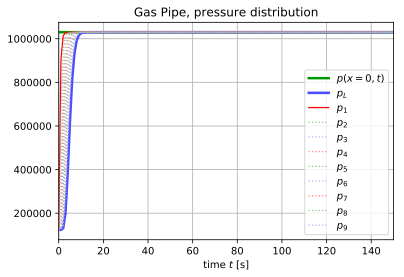

In [42]:
plt.plot(tm,p_0,linewidth=LW1,color=Cg1,label=r"$p(x=0,t)$")
plt.plot(tm,pL,linewidth=LW1,color=Cb1,label=r"$p_L$")
plt.plot(tm,p1,linewidth=LW2,color=Cr1,label=r"$p_1$")
plt.plot(tm,p2,linewidth=LW2,color=Cg2,linestyle=LS2,label=r"$p_2$")
plt.plot(tm,p3,linewidth=LW2,color=Cb2,linestyle=LS2,label=r"$p_3$")
plt.plot(tm,p4,linewidth=LW2,color=Cr2,linestyle=LS2,label=r"$p_4$")
plt.plot(tm,p5,linewidth=LW2,color=Cg2,linestyle=LS2,label=r"$p_5$")
plt.plot(tm,p6,linewidth=LW2,color=Cb2,linestyle=LS2,label=r"$p_6$")
plt.plot(tm,p7,linewidth=LW2,color=Cr2,linestyle=LS2,label=r"$p_7$")
plt.plot(tm,p8,linewidth=LW2,color=Cg2,linestyle=LS2,label=r"$p_8$")
plt.plot(tm,p9,linewidth=LW2,color=Cb2,linestyle=LS2,label=r"$p_9$")
plt.title(r"Gas Pipe, pressure distribution")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,150)
plt.legend()
if createPDF:
    figfile = "gasPipeSim-1.pdf"
    plt.savefig(figpath+figfile)

In [43]:
tnk = ModelicaSystem("GasPipe.mo","GasPipe.SimStepGasPipe")

2017-08-09 10:55:58,679 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.af500310e645416fab803638bdc7b57c


In [44]:
tnk.setSimulationOptions(stopTime=150,stepSize=1)
tnk.simulate()

In [45]:
tm,p_0,p0,p1,p2,p3 = tnk.getSolutions("time","p_0","gp.p0","gp.p[1]","gp.p[2]","gp.p[3]")
p4,p5,p6,p7 = tnk.getSolutions("gp.p[4]","gp.p[5]","gp.p[6]","gp.p[7]")
p8,p9,pL = tnk.getSolutions("gp.p[8]","gp.p[9]","_pL")

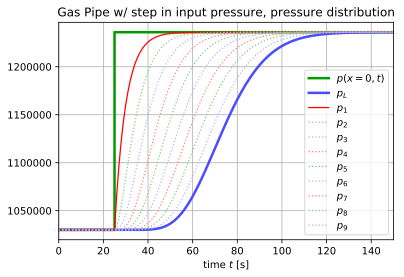

In [46]:
plt.plot(tm,p_0,linewidth=LW1,color=Cg1,label=r"$p(x=0,t)$")
plt.plot(tm,pL,linewidth=LW1,color=Cb1,label=r"$p_L$")
plt.plot(tm,p1,linewidth=LW2,color=Cr1,label=r"$p_1$")
plt.plot(tm,p2,linewidth=LW2,color=Cg2,linestyle=LS2,label=r"$p_2$")
plt.plot(tm,p3,linewidth=LW2,color=Cb2,linestyle=LS2,label=r"$p_3$")
plt.plot(tm,p4,linewidth=LW2,color=Cr2,linestyle=LS2,label=r"$p_4$")
plt.plot(tm,p5,linewidth=LW2,color=Cg2,linestyle=LS2,label=r"$p_5$")
plt.plot(tm,p6,linewidth=LW2,color=Cb2,linestyle=LS2,label=r"$p_6$")
plt.plot(tm,p7,linewidth=LW2,color=Cr2,linestyle=LS2,label=r"$p_7$")
plt.plot(tm,p8,linewidth=LW2,color=Cg2,linestyle=LS2,label=r"$p_8$")
plt.plot(tm,p9,linewidth=LW2,color=Cb2,linestyle=LS2,label=r"$p_9$")
plt.title(r"Gas Pipe w/ step in input pressure, pressure distribution")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,150)
plt.legend()
if createPDF:
    figfile = "gasPipeSim-2.pdf"
    plt.savefig(figpath+figfile)

In [47]:
tnk = ModelicaSystem("GasPipe.mo","GasPipe.SimStepCompareGasPipe")

2017-08-09 10:56:02,485 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.dietmarw.port.8596ef9293d64fe28598e7e94aaa7df2


In [48]:
tnk.setSimulationOptions(stopTime=150,stepSize=1)
tnk.simulate()

In [49]:
tm,pL10,pL30,pL90,pL300 = tnk.getSolutions("time","_pL10","_pL30","_pL90","_pL300")

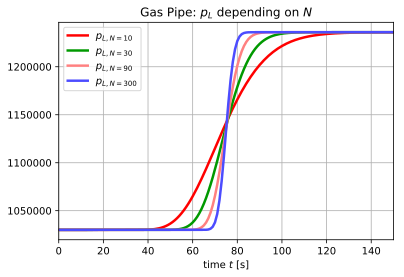

In [50]:
plt.plot(tm,pL10,linewidth=LW1,color=Cr1,label=r"$p_{L,N=10}$")
plt.plot(tm,pL30,linewidth=LW1,color=Cg1,label=r"$p_{L,N=30}$")
plt.plot(tm,pL90,linewidth=LW1,color=Cr2,label=r"$p_{L,N=90}$")
plt.plot(tm,pL300,linewidth=LW1,color=Cb1,label=r"$p_{L,N=300}$")
plt.title(r"Gas Pipe: $p_L$ depending on $N$")
plt.xlabel(r"time $t$ [s]")
plt.grid()
plt.xlim(0,150)
plt.legend()
if createPDF:
    figfile = "gasPipeSim-3.pdf"
    plt.savefig(figpath+figfile)